In [1]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets

import time

tic = time.time()

num_epochs = 10
num_classes = 10
learning_rate = 0.01

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                           shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                          shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')


class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(

            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layer = nn.Sequential(
            #nn.Dropout(p=0.1),
            nn.Linear(14 * 14 * 16, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 16),
            nn.ReLU(inplace=True),
            #nn.Dropout(p=0.1),
            nn.Linear(16, 10)
        )

    def forward(self, x):

        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)

        return x

def test_model(model):
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))
  return (correct / total)

model = CNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
per_epoch_loss_list = []
per_epoch_acc_list = []
test_per_epoch_acc_list = []

for epoch in range(num_epochs):
    epoch_no_correct=0
    epoch_total=0
    epoch_loss=0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
        epoch_no_correct +=correct
        epoch_total +=total
        epoch_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
        
    per_epoch_loss_list.append(epoch_loss/len(train_loader))
    per_epoch_acc_list.append(epoch_no_correct/epoch_total)

    test_acc_per_epoch = test_model(model)
    test_per_epoch_acc_list.append(test_acc_per_epoch)


toc = time.time()

print('duration = ', toc - tic)
print(per_epoch_loss_list)
print(per_epoch_acc_list)
print(test_per_epoch_acc_list)



100%|██████████| 9912422/9912422 [00:00<00:00, 346236321.46it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 110223561.26it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 146194803.97it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 4091608.41it/s]


Streaming output truncated to the last 5000 lines.
Epoch [2/10], Step [41400/60000], Loss: 2.1448, Accuracy: 0.00%
Epoch [2/10], Step [41500/60000], Loss: 2.3775, Accuracy: 0.00%
Epoch [2/10], Step [41600/60000], Loss: 2.4744, Accuracy: 0.00%
Epoch [2/10], Step [41700/60000], Loss: 2.2496, Accuracy: 0.00%
Epoch [2/10], Step [41800/60000], Loss: 2.3899, Accuracy: 0.00%
Epoch [2/10], Step [41900/60000], Loss: 2.2422, Accuracy: 0.00%
Epoch [2/10], Step [42000/60000], Loss: 2.1890, Accuracy: 0.00%
Epoch [2/10], Step [42100/60000], Loss: 2.3820, Accuracy: 0.00%
Epoch [2/10], Step [42200/60000], Loss: 2.3070, Accuracy: 0.00%
Epoch [2/10], Step [42300/60000], Loss: 2.6135, Accuracy: 0.00%
Epoch [2/10], Step [42400/60000], Loss: 2.3690, Accuracy: 0.00%
Epoch [2/10], Step [42500/60000], Loss: 2.1842, Accuracy: 0.00%
Epoch [2/10], Step [42600/60000], Loss: 2.4064, Accuracy: 0.00%
Epoch [2/10], Step [42700/60000], Loss: 2.4325, Accuracy: 0.00%
Epoch [2/10], Step [42800/60000], Loss: 2.3151, Accur

Text(0.5, 1.0, 'Batch Size = 1  (Arash Azarfar 12345678)')

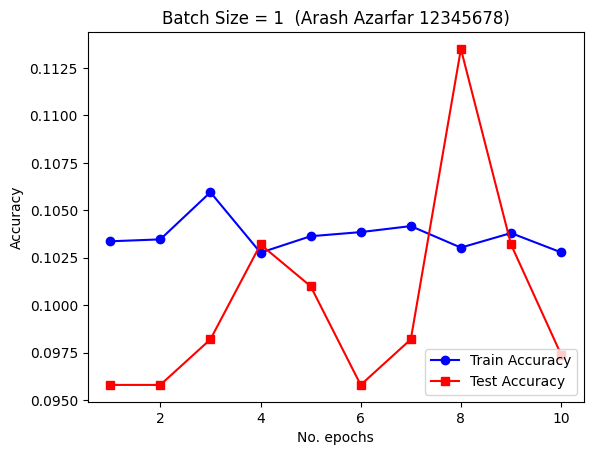

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(1,num_epochs+1),per_epoch_acc_list, color='blue', marker='o') 
plt.plot(range(1,num_epochs+1),test_per_epoch_acc_list,  color='red', marker='s') 
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.title('Batch Size = 1  (Arash Azarfar 12345678)')

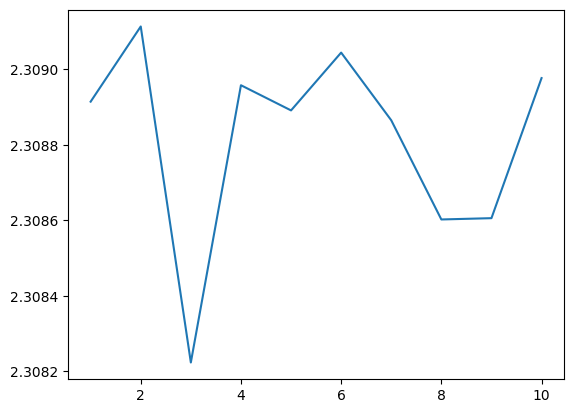

In [3]:
plt.plot(range(1,num_epochs+1),per_epoch_loss_list) 

In [4]:
# Find the BatchNorm2D layer in the model
batch_norm_layer = None
for module in model.modules():
    if isinstance(module, torch.nn.BatchNorm2d):
        batch_norm_layer = module
        break

# Check if a BatchNorm2D layer was found
if batch_norm_layer is not None:
    # Access the learned beta and gamma parameters
    beta = batch_norm_layer.bias.data
    gamma = batch_norm_layer.weight.data
    print(beta, gamma)
    print(beta.shape, gamma.shape)
else:
    print("No BatchNorm2D layer found in the model.")

tensor([-0.5511, -0.2130, -0.0800, -0.3429, -0.3884, -0.4778, -0.5064,  0.1571,
        -0.3384, -0.5606, -0.1016, -0.1648, -0.3014, -0.0495, -0.3273, -0.3437]) tensor([0.1901, 0.5191, 0.8925, 0.1557, 0.7472, 0.6703, 0.1795, 0.2183, 0.1779,
        0.3910, 0.7522, 1.0910, 0.2097, 0.9245, 0.7235, 0.8782])
torch.Size([16]) torch.Size([16])


In [5]:
batch_norm_layer = None
for module in model.modules():
    if isinstance(module, torch.nn.BatchNorm2d):
        batch_norm_layer = module
        print(batch_norm_layer.bias.data)
        print(batch_norm_layer.weight.data)

tensor([-0.5511, -0.2130, -0.0800, -0.3429, -0.3884, -0.4778, -0.5064,  0.1571,
        -0.3384, -0.5606, -0.1016, -0.1648, -0.3014, -0.0495, -0.3273, -0.3437])
tensor([0.1901, 0.5191, 0.8925, 0.1557, 0.7472, 0.6703, 0.1795, 0.2183, 0.1779,
        0.3910, 0.7522, 1.0910, 0.2097, 0.9245, 0.7235, 0.8782])
tensor([ 0.0258, -0.6513,  0.0677, -0.3108, -0.4096, -0.2165,  0.0415, -0.4322,
        -0.0188, -0.3004, -0.3044, -0.2062,  0.0366, -0.1347, -0.0018, -0.3786])
tensor([0.9284, 0.4177, 0.8952, 0.7661, 0.0641, 0.1863, 0.9693, 0.7162, 0.9093,
        0.7212, 0.8449, 0.9620, 0.9081, 0.9094, 0.8955, 0.0440])


In [6]:
        for param_group in optimizer.param_groups:
          print(param_group['lr'])

0.01
